In [1]:
from CQS.methods import Hamiltonian, Cartan, FindParameters
import numpy as np
from CQS.util.verification import exactU, Nident, PauliExpUnitary, KHK
from met_brewer import met_brew


In [26]:

dt = 0.1
ham = Hamiltonian(2, [(1, 'tfim', False)])
cartan = Cartan(ham, involution='countY')
params2 = FindParameters(cartan, optimizerMethod='Lax', dt=dt, truncateExp=30)
params2old = FindParameters(cartan)#, optimizerMethod='Lax', dt=dt, truncateExp=30)


ham = Hamiltonian(4, [(1, 'tfim', False)])
cartan = Cartan(ham, involution='countY')
params4 = FindParameters(cartan, optimizerMethod='Lax', dt=dt, truncateExp=30)
params4old = FindParameters(cartan)

ham = Hamiltonian(6, [(1, 'tfim', False)])
cartan = Cartan(ham, involution='countY')
params6 = FindParameters(cartan, optimizerMethod='Lax', dt=dt, truncateExp=30)
params6old = FindParameters(cartan)

ham = Hamiltonian(8, [(1, 'tfim', False)])
cartan = Cartan(ham, involution='countY')
params8 = FindParameters(cartan, optimizerMethod='Lax', dt=dt, truncateExp=30)
params8old = FindParameters(cartan)

ham = Hamiltonian(10, [(1, 'tfim', False)])
cartan = Cartan(ham, involution='countY')
params10= FindParameters(cartan, optimizerMethod='Lax', dt=dt, truncateExp=30)
params10old = FindParameters(cartan)


--- 0.1956498622894287 seconds ---
Optimization terminated successfully.
         Current function value: -0.388932
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
--- 0.003955841064453125 seconds ---
Optimization Error:
1.408409672457071e-14
--- 1.1297657489776611 seconds ---
Optimization terminated successfully.
         Current function value: -2.909188
         Iterations: 37
         Function evaluations: 43
         Gradient evaluations: 43
--- 1.0481207370758057 seconds ---
Optimization Error:
4.8174881019109107e-11
--- 7.851296901702881 seconds ---
Optimization terminated successfully.
         Current function value: -4.585055
         Iterations: 227
         Function evaluations: 239
         Gradient evaluations: 239
--- 78.20217895507812 seconds ---
Optimization Error:
5.62198872871437e-10


In [20]:
import matplotlib.pyplot as plt

def plot_flow(params):
    flow = params.flow
    length = flow.shape[1]
    colors = met_brew(name="Hiroshige", n=len(flow[:,0]), brew_type="continuous")
    fig, ax = plt.subplots(1,3,sharey=True)
    for i in range(params.lenm + params.lenK):
        if i < params.lenh:
            ax[0].plot(np.arange(length)*dt, flow[i],
                       label=r'$\alpha_{}$'.format(i), color=colors[i])
        elif i < params.lenm:
            ax[1].plot(np.arange(length)*dt, flow[i],
                    label=r'$\tilde{{\beta}}_{}$'.format(i-params.lenh), color=colors[i])
        else:
            ax[2].plot(np.arange(length)*dt, flow[i],
                       label=r'$\chi_{}$'.format(i - params.lenm), color=colors[i])
    plt.suptitle(
        'Parameter Flow of Four Site Transverse Field Ising Model ({} parameters)'.format(str(flow.shape[0])))
    ax[0].set_xlim([0, length*dt])
    ax[1].set_xlim([0, length*dt])
    ax[2].set_xlim([0, length*dt])

    ax[0].set_xlabel('Solver time dt: {}'.format(dt))
    ax[1].set_xlabel('Solver time dt: {}'.format(dt))
    ax[2].set_xlabel('Solver time dt: {}'.format(dt))

    ax[0].set_ylabel('Parameter Value')
    ax[0].hlines(0, 0, length, linestyles='dashed', color='k')
    ax[1].hlines(0, 0, length, linestyles='dashed', color='k')
    ax[2].hlines(0, 0, length, linestyles='dashed', color='k')
    ax[0].set_title(r'Convergence of $\alpha$')
    ax[1].set_title(r'Convergence of $\tilde{{\beta}}$')
    ax[2].set_title(r'Convergence of $\chi$')

    fig.tight_layout()

    fig.set_size_inches(10,3)

    plt.show()
    U = exactU(params.hamiltonian.HCoefs, params.hamiltonian.HTuples, 1)
    KHKval = KHKtypeI(params.kCoefs, params.hCoefs,
                  params.cartan.k, params.cartan.h)
    print(np.linalg.norm(KHKval - U))


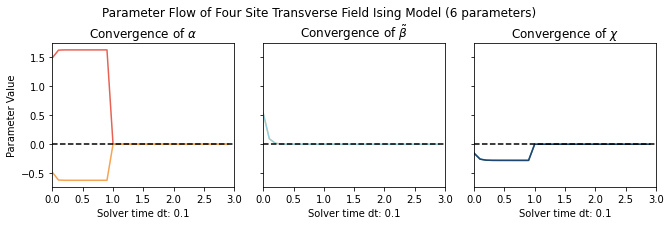

4.91125184614687e-07


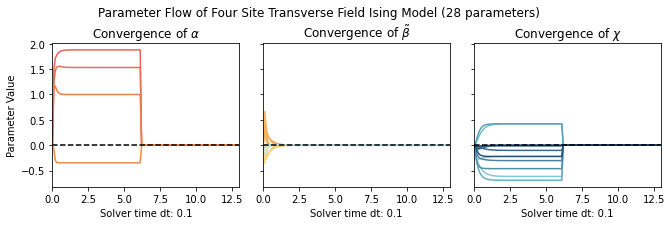

1.214923009584041e-07


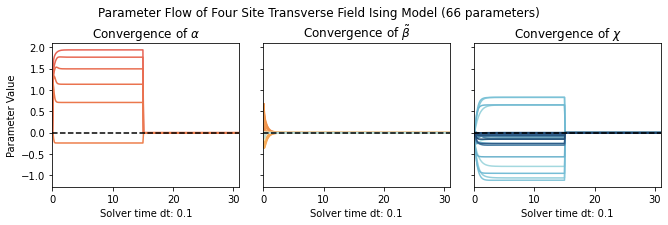

1.1515642994843966e-07


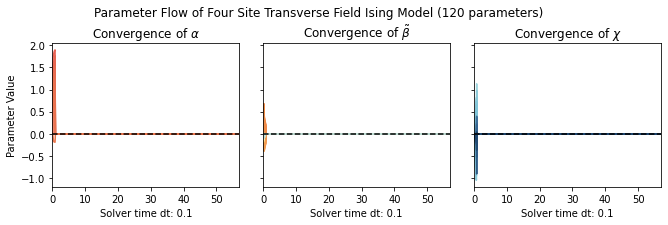

7.895350427903463


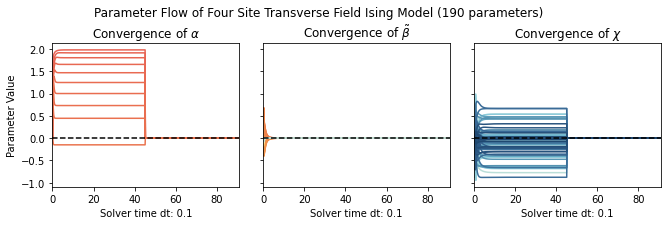

4.5584205283426206e-05


In [21]:
plot_flow(params2)
plot_flow(params4)
plot_flow(params6)
plot_flow(params8)
plot_flow(params10)


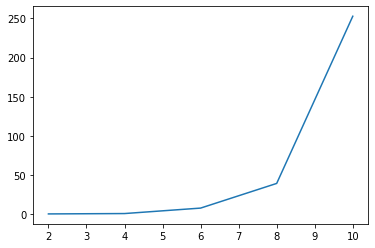

In [23]:
plt.plot([2,4,6,8,10], [params2.timepassed, params4.timepassed, params6.timepassed, params8.timepassed, params10.timepassed])


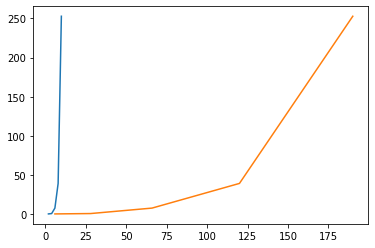

In [25]:
plt.plot([2, 4, 6, 8, 10], [params2.timepassed, params4.timepassed,
         params6.timepassed, params8.timepassed, params10.timepassed], color='b',label='Lax')
plt.plot([2, 4, 6, 8, 10], [params2old.timepassed, params2old.timepassed,
         params2old.timepassed, params2old.timepassed, params2old.timepassed], color='g', label='old Method')
plt.plot([params2.flow.shape[0], params4.flow.shape[0], params6.flow.shape[0], params8.flow.shape[0], params10.flow.shape[0]], [params2.timepassed, params4.timepassed,
         params6.timepassed, params8.timepassed, params10.timepassed])


In [ ]:
U = exactU(ham.HCoefs, ham.HTuples, 1)

In [17]:
import numpy as np
from numpy import kron
from scipy.linalg import expm, norm

import CQS.util.IO as IO


def KHKtypeI(kCoefs, hCoefs, k, h):
    N = len(h[0])
    Matrix = Nident(N)

    #First loop of K terms:
    K = expm(-1j*PauliSum(kCoefs, k))
    np.matmul(K, Matrix, out=Matrix)

    #H terms
    H = expm(1j*PauliSum(hCoefs, h))
    np.matmul(H, Matrix, out=Matrix)

    K = expm(1j*PauliSum(kCoefs, k))
    np.matmul(K, Matrix, out=Matrix)
    return Matrix


def PauliSum(coefficients, tuples):
    H = np.zeros((2**len(tuples[0]),)*2, dtype=np.complex128)

    for (co, term) in zip(coefficients, tuples):
        H += IO.tuplesToMatrix(co, term)
    return H


In [ ]:
#KHK = KHKtypeI(params.kCoefs, params.hCoefs,
#params.cartan.k, params.cartan.h)
KHKval = KHKtypeI(params.kCoefs, params.hCoefs,
                  params.cartan.k, params.cartan.h)
#KHKvalComm = KHK(params.kCoefs, params.hCoefs,
                 #params.cartan.k, params.cartan.h)
#KHKval2 = KHK(params2.kCoefs, params2.hCoefs, params2.cartan.k, params2.cartan.h)
#print(np.linalg.norm(KHKval - KHKval2))# < 1e-5


In [ ]:
print(np.linalg.norm(KHKval - U))
#print(np.linalg.norm(KHKvalComm - U))

7.895350427903463


0.0008833040931808371

1.8896911218275023e-07

4.254253897967273e-09



In [ ]:
from numpy

SyntaxError: invalid syntax (1853520162.py, line 1)